In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Распознавание изображений из набора данных Cifar10

*Разбор данного раздела:* https://youtu.be/c78nXd8NuK4?t=964

In [ ]:
#Загружаем cifar10
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
x_train10.shape

(50000, 32, 32, 3)

In [ ]:
#Определяем названия классов по порядку
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

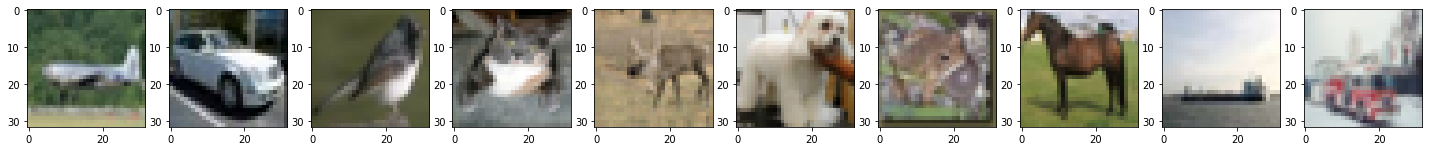

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train10==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train10[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

In [ ]:
# Посмотрим размеры выборок перед обучением
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


Epoch 1/20
391/391 [==============================] - 12s 29ms/step - loss: 1.5483 - accuracy: 0.4315 - val_loss: 1.6084 - val_accuracy: 0.4454
Epoch 2/20
391/391 [==============================] - 12s 30ms/step - loss: 1.1118 - accuracy: 0.6008 - val_loss: 0.9745 - val_accuracy: 0.6618
Epoch 3/20
391/391 [==============================] - 11s 28ms/step - loss: 0.9439 - accuracy: 0.6653 - val_loss: 0.8341 - val_accuracy: 0.7123
Epoch 4/20
391/391 [==============================] - 11s 29ms/step - loss: 0.8448 - accuracy: 0.7027 - val_loss: 0.7584 - val_accuracy: 0.7353
Epoch 5/20
391/391 [==============================] - 11s 28ms/step - loss: 0.7735 - accuracy: 0.7271 - val_loss: 0.7076 - val_accuracy: 0.7496
Epoch 6/20
391/391 [==============================] - 11s 29ms/step - loss: 0.7122 - accuracy: 0.7497 - val_loss: 0.6705 - val_accuracy: 0.7650
Epoch 7/20
391/391 [==============================] - 12s 30ms/step - loss: 0.6770 - accuracy: 0.7628 - val_loss: 0.6871 - val_accuracy:

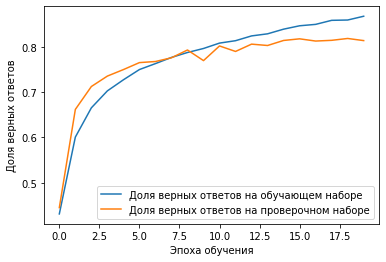

In [ ]:
#задаём batch_size
batch_size = 128 

#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
#model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Пятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

1. При замене в первом скрытом слое количества нейронов получились следующие показатели точности на тестовой выборке:
2 нерона = 80,66 %
4 нейрона = 81,73 %
16 неронов = 82,38 %
При возврате к 32 нейронам = 81,83 %
Вывод: недостаток нейронов немного снижает точность модели хоть и не является критичным. Сеть требует тестирования для подбора наиболее оптимального значения, но не нужно забывать про погрешность и стандартное отклонение. Лучше проверку делать неоднократно, во избежание выброса принятого за истину.
2. При замене активационной функции во всех скрытых слоях с relu на linear точность сети понизилась до показателя 74,72 %. Вывод: при определенной схожести функций, relu обеспечивает более высокую точность расчета весов и работы системы, быстрее обучается и позволяет получить более высокий результат.
3. При изменениях размера batch_size получены следующие показатели точности на тестовой выборке:
batch_size 10 = 79,01 %
batch_size 100 = 83,04 %
batch_size 10 000 = 12,29 % (15,92 % при перепроверке)
batch_size 50 000 не поддался расчеты, т.к. вызвал ООМ ошибку перегрузив графический процессор, которому не хватило вычислительной мощности. Даже 15 000 было непроходным значением. Вывод: batch_size требует подбора и тестирования для выбора оптимального показателя, т.к. снижение значения снижает точность за счет разбалансирования весов пытающихся оптимально подстроиться к маленьким выборкам вектора, которые возможно сильные имеют отклонения от медианного значения а существенное превышение ведет к срыву показателей точности с явной демонстрацией переобучения. Так при первой проверке точность на тестовой выборке на первой эпохе оставляла 11,8%, повысилась равномерно до 33,4% и равномерно снизилась до 12,29% - классическая картина переобучения. При проверке (подумал, что это может быть выбросом) показатели составляли 11,71%, 24,64% и 15,92% соответственно. Та же ситуация переобучения.